<a href="https://colab.research.google.com/github/ShindeParth31/student-performance-and-sentiment-analysis/blob/main/student_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
from google.colab import files
uploaded = files.upload()


Saving student_pass_fail.csv to student_pass_fail.csv


In [3]:
import pandas as pd

df = pd.read_csv("student_pass_fail.csv")
df.head()


,Study_Hours,Attendance,Pass
0,6,89,1
1,3,64,0
2,12,63,1
3,14,52,0
4,10,99,1


In [4]:
df.isnull().sum()


,0
Study_Hours,0
Attendance,0
Pass,0


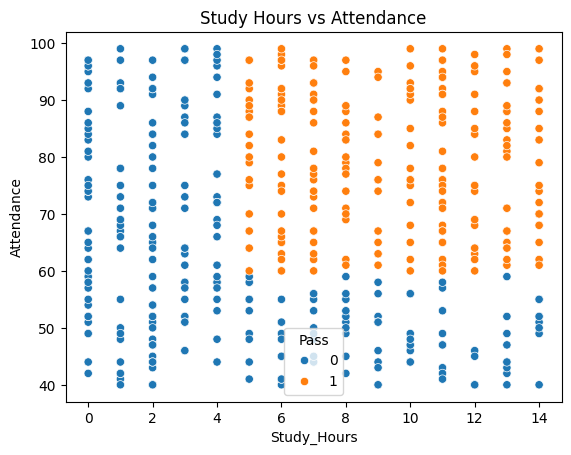

In [5]:
sns.scatterplot(x="Study_Hours", y="Attendance", hue="Pass", data=df)
plt.title("Study Hours vs Attendance")
plt.show()


In [6]:
X = df[["Study_Hours", "Attendance"]]
y = df["Pass"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [8]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)


Accuracy: 0.8666666666666667
Confusion Matrix:
 [[66  5]
 [15 64]]


In [9]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})
coefficients


,Feature,Coefficient
0,Study_Hours,0.644248
1,Attendance,0.142219


**Task 2 - Sentiment analysis** **bold text**

In [10]:
import pandas as pd
import re
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [11]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
from google.colab import files
uploaded = files.upload()


Saving reviews_sentiment.csv to reviews_sentiment.csv


In [13]:
df = pd.read_csv("reviews_sentiment.csv")
df.head()


,Review,Sentiment
0,very bad,negative
1,worth the money,positive
2,disappointed,negative
3,poor quality,negative
4,terrible service,negative


In [14]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

df["Cleaned_Review"] = df["Review"].apply(clean_text)
df


,Review,Sentiment,Cleaned_Review
0,very bad,negative,bad
1,worth the money,positive,worth money
2,disappointed,negative,disappointed
3,poor quality,negative,poor quality
4,terrible service,negative,terrible service
...,...,...,...
995,excellent product,positive,excellent product
996,very bad,negative,bad
997,not satisfied,negative,satisfied
998,very bad,negative,bad


In [15]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["Cleaned_Review"])
y = df["Sentiment"]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [18]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label="positive"))
print("Recall:", recall_score(y_test, y_pred, pos_label="positive"))
print("F1 Score:", f1_score(y_test, y_pred, pos_label="positive"))


Accuracy: 0.9433333333333334
Precision: 0.896969696969697
Recall: 1.0
F1 Score: 0.9456869009584664


In [19]:
df["Predicted"] = model.predict(X)
df


,Review,Sentiment,Cleaned_Review,Predicted
0,very bad,negative,bad,negative
1,worth the money,positive,worth money,positive
2,disappointed,negative,disappointed,negative
3,poor quality,negative,poor quality,negative
4,terrible service,negative,terrible service,negative
...,...,...,...,...
995,excellent product,positive,excellent product,positive
996,very bad,negative,bad,negative
997,not satisfied,negative,satisfied,positive
998,very bad,negative,bad,negative
